# Week 4 Lab Assignment: Logistic Regression and Multiple Linear Regression

### Objective
In this lab, you will implement logistic regression and multiple linear regression models using Python. You will learn how to build these models, interpret the coefficients, and evaluate their performance on a dataset.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: pandas, scikit-learn, matplotlib, numpy.

In [36]:
# Install necessary packages
%pip install pandas scikit-learn matplotlib numpy seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, modeling, and evaluation.


In [37]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, r2_score, mean_squared_error
%matplotlib inline

### 3. Load and Explore Dataset
**Objective:** Gain a preliminary understanding of the dataset to be used for modeling.

**Tasks:**
1. **Load the Dataset:** Import the dataset into a Pandas DataFrame.
2. **Inspect the Data:** Use Pandas functions to inspect the first few rows, check for missing values, and understand the data types.
3. **Summary Statistics:** Generate summary statistics for numerical columns.

In [38]:
# Load the dataset
#df = pd.read_csv('customer_behavior.csv')
df = pd.read_csv('customer_behavior_old.csv')

# Inspect the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Generate summary statistics
print(df.describe())

   Age  Income Category  Number_of_Purchases  Target  Continuous_Target
0   25   50000        A                    3       0             100500
1   45   80000        B                    8       1             160800
2   30   54000        A                    4       0             109080
3   35   60000        C                    2       1             121200
4   50   95000        B                    7       1             191950
Age                    0
Income                 0
Category               0
Number_of_Purchases    0
Target                 0
Continuous_Target      0
dtype: int64
             Age         Income  Number_of_Purchases     Target  \
count  60.000000      60.000000            60.000000  60.000000   
mean   39.766667   72550.000000             5.016667   0.666667   
std    10.131954   16747.046286             2.220793   0.475383   
min    22.000000   48000.000000             1.000000   0.000000   
25%    31.750000   58000.000000             3.000000   0.000000   
50%

### 4. Data Preparation
**Objective:** Prepare the data for modeling by handling missing values and encoding categorical variables.

**Tasks:**
1. **Handle Missing Values:** Deal with any missing values in the dataset.
2. **Encode Categorical Variables:** Convert categorical variables into numerical format using techniques like one-hot encoding.
3. **Train-Test Split:** Split the data into training and testing sets.

In [39]:
# Handle missing values
df = df.dropna()

# Encode categorical variables (if necessary)
df = pd.get_dummies(df, drop_first=True)

# Split the data into training and testing sets
X = df.drop(['Target', 'Continuous_Target'], axis=1)
y_class = df['Target']
y_reg = df['Continuous_Target']
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.3, random_state=42)
print(f'Training set size (classification): {X_train_class.shape}')
print(f'Test set size (classification): {X_test_class.shape}')
print(f'Training set size (regression): {X_train_reg.shape}')
print(f'Test set size (regression): {X_test_reg.shape}')

Training set size (classification): (42, 5)
Test set size (classification): (18, 5)
Training set size (regression): (42, 5)
Test set size (regression): (18, 5)


### 5. Implementing Logistic Regression
**Objective:** Build and evaluate a logistic regression model on the dataset.

**Tasks:**
1. **Build the Model:** Create a logistic regression model using Scikit-learn.
2. **Train the Model:** Train the model on the training data.
3. **Evaluate the Model:** Use accuracy, confusion matrix, and classification report to evaluate the model's performance.

Logistic Regression Accuracy: 0.9444444444444444
[[9 0]
 [1 8]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.89      0.94         9

    accuracy                           0.94        18
   macro avg       0.95      0.94      0.94        18
weighted avg       0.95      0.94      0.94        18



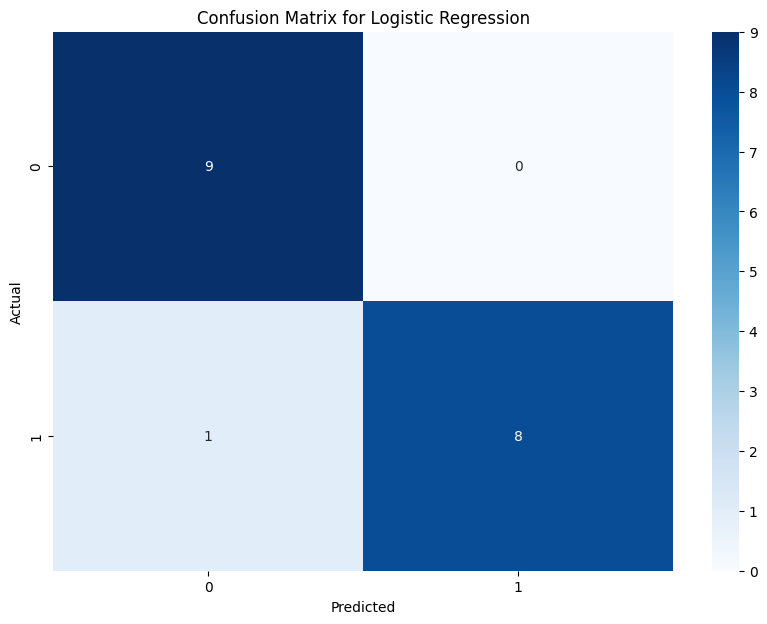

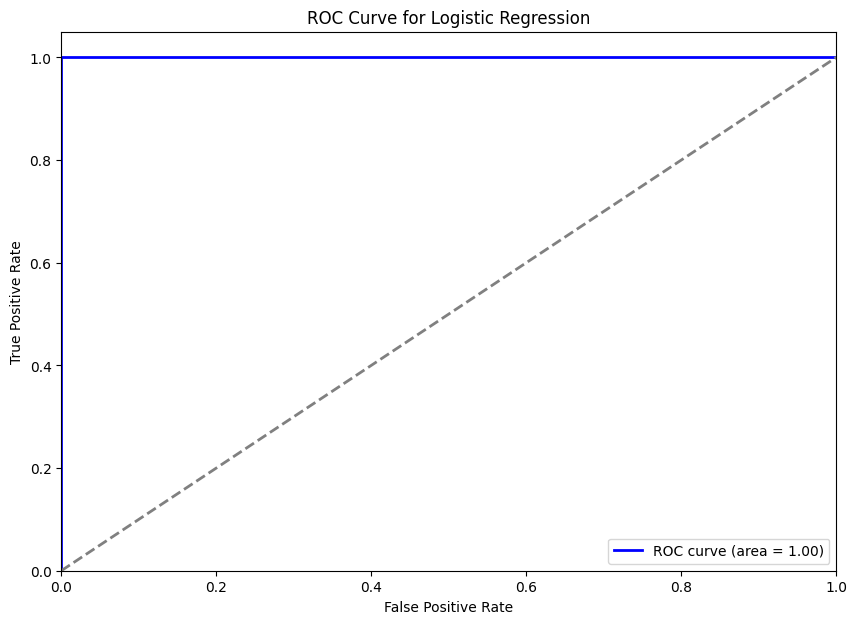

In [51]:
# Build and train the Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)

# Make predictions
logistic_predictions = logistic_model.predict(X_test_class)
logistic_probabilities = logistic_model.predict_proba(X_test_class)[:, 1]  # Probabilities for class 1

# Evaluate the model
logistic_accuracy = accuracy_score(y_test_class, logistic_predictions)
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(confusion_matrix(y_test_class, logistic_predictions))
print(classification_report(y_test_class, logistic_predictions))


# Confusion Matrix Visualization for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test_class, logistic_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Visualization for Logistic Regression
fpr, tpr, _ = roc_curve(y_test_class, logistic_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

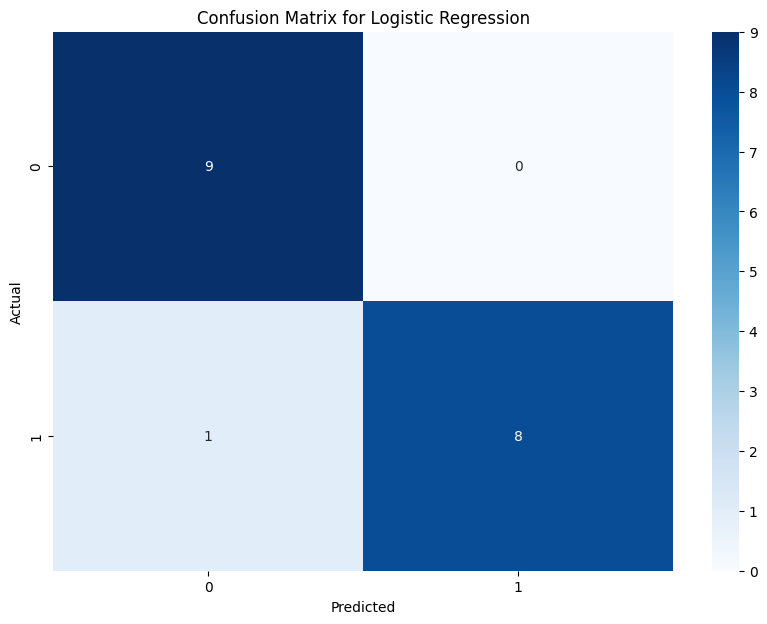

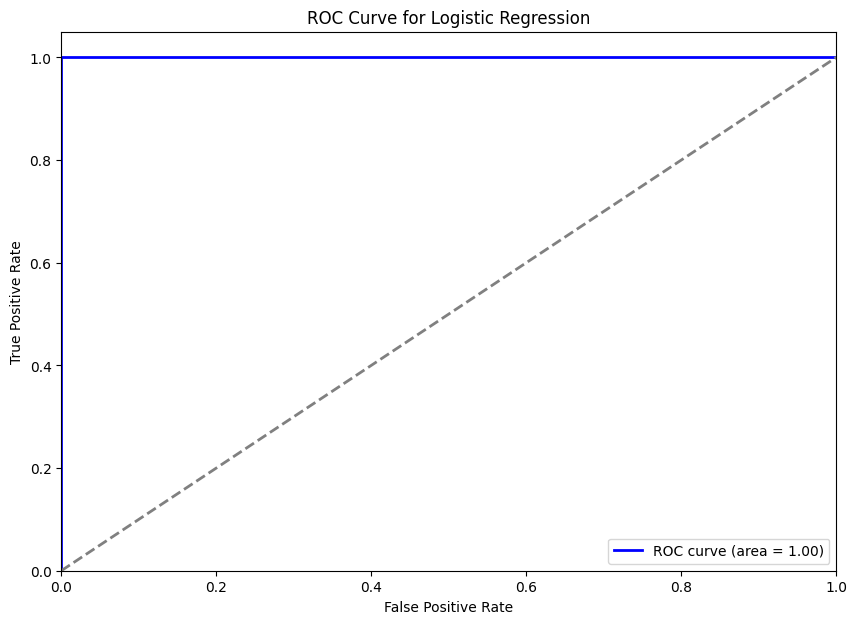

### 6. Implementing Multiple Linear Regression
**Objective:** Build and evaluate a multiple linear regression model on the dataset.

**Tasks:**
1. **Build the Model:** Create a multiple linear regression model using Scikit-learn.
2. **Train the Model:** Train the model on the training data.
3. **Evaluate the Model:** Use R-squared and mean squared error to evaluate the model's performance.

Linear Regression R-squared: 0.9989966857171941
Linear Regression Mean Squared Error: 674217.5390553233


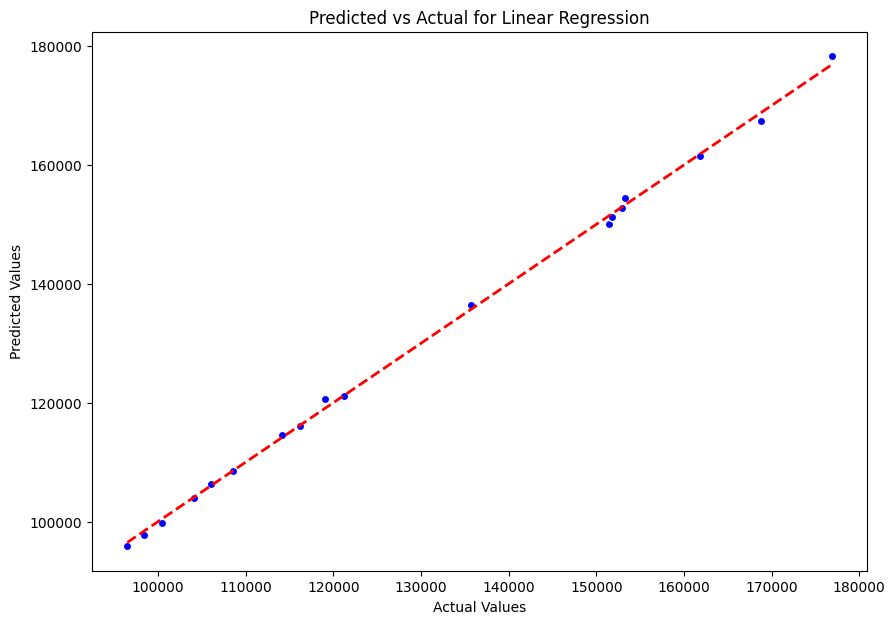

In [45]:
# Build and train the Multiple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)

# Make predictions
linear_predictions = linear_model.predict(X_test_reg)

# Evaluate the model
r2 = r2_score(y_test_reg, linear_predictions)
mse = mean_squared_error(y_test_reg, linear_predictions)
print(f'Linear Regression R-squared: {r2}')
print(f'Linear Regression Mean Squared Error: {mse}')

# Scatter Plot for Predicted vs Actual for Multiple Linear Regression
plt.figure(figsize=(10, 7))
plt.scatter(y_test_reg, linear_predictions, color='blue', edgecolor='w', label='Predicted vs. Actual')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], color='red', lw=2, linestyle='--')
plt.title('Predicted vs Actual for Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### 7. Comparing Model Performance
**Objective:** Compare the performance of logistic regression and multiple linear regression models.

**Tasks:**
1. **Compare Metrics:** Print and compare the accuracy, R-squared, and other metrics of the models.
2. **Model Selection:** Discuss which model performed best and why.

In [44]:
# Compare model performance
print(f'Logistic Regression Accuracy: {logistic_accuracy}')
print(f'Linear Regression R-squared: {r2}')
print(f'Linear Regression Mean Squared Error: {mse}')

# Discuss model performance
# (Provide your analysis here based on the results)

Logistic Regression Accuracy: 0.9444444444444444
Linear Regression R-squared: 0.9989966857171941
Linear Regression Mean Squared Error: 674217.5390553233


    ### 8. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code and model evaluations.
- A brief report (1-2 paragraphs) summarizing the findings, comparing model performance, and discussing the applications of logistic and linear regression in business scenarios.

**Deadline:** Submit your completed notebook and report to the course portal by end of class.